## Purpose of this notebook:
- Provide a model that can predict the home value of single unit properties that the tax district assessed during the  months of May through August 2017, using number of bedrooms, number of bathrooms, and square feet of the property as features
- Create and evaluate different models to find the effectiveness of the selected features
- Using the FIPS numbers, find the specific county for each home in the data, and create a seperate dataframe to display the tax rate for each county
- Provide insights into the decisions regarding features, models, etc. that went in the project



In [1]:
# imports

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn.preprocessing
import warnings
warnings.filterwarnings("ignore")

import env
import acquire
import prepare

## Acquire

In [2]:
# acquire data 

df = acquire.get_zillow_data()

In [ ]:
# Take a look at the data

df.head()

In [ ]:
# Print a structured shape of the original data

print(f'My original dataframe is coming in with {df.shape[0]} rows and {df.shape[1]} columns.')

In [ ]:
# Looking at the columns with more detail

df.info()

In [ ]:
# Take a look at the original max value of the features that I want adjust for outliers

df[['calculatedfinishedsquarefeet', 'taxvaluedollarcnt']].max()

### Takeaways:
- This data set is rife with null values
- There are many redundant columns (several square footage columns, several structural columns, etc)
- There are some serious outliers that are skewing the values

## Prepare

### For prepare, I did the following:
- renamed columns to make them understandable
- dropped a total of 52 null/NAN, irrelevant, and redundant rows
- removed outliers from appraisal_value and square_feet

In [3]:
# Use the clean_zillow funtion to drop columns, drop nulls, and address outliers

df = prepare.clean_zillow(df)
df

,bathrooms,bedrooms,square_feet,fips,longitude,city,zip_code,year_built,appraisal_value,taxes
0,2.0,3.0,1316.0,6037.0,-118.355396,12447.0,95997.0,1923.0,205123.0,2627.48
1,2.0,3.0,1458.0,6037.0,-118.113100,5534.0,97318.0,1970.0,136104.0,2319.90
2,1.0,2.0,1421.0,6037.0,-118.291863,12447.0,96018.0,1911.0,35606.0,543.69
3,3.0,4.0,2541.0,6059.0,-117.912245,38032.0,96958.0,2003.0,880456.0,9819.72
4,2.0,3.0,1491.0,6037.0,-118.338253,54722.0,96162.0,1955.0,107110.0,1399.27
...,...,...,...,...,...,...,...,...,...,...
28119,2.0,6.0,2634.0,6037.0,-118.298006,12447.0,95985.0,1921.0,878190.0,12766.88
28120,1.5,4.0,1187.0,6059.0,-118.015068,16764.0,96180.0,1959.0,465999.0,5552.68
28121,3.0,5.0,3015.0,6059.0,-117.578817,13693.0,96983.0,2002.0,852813.0,11662.88
28122,3.0,5.0,2992.0,6037.0,-118.554206,12447.0,96356.0,1977.0,1120000.0,13663.03


In [4]:
# Take a look at my post-cleaning dataframe, which is much more manageable.

print(f'My cleaned dataframe is now coming in with {df.shape[0]} rows and {df.shape[1]} columns.')

My cleaned dataframe is now coming in with 24903 rows and 10 columns.


In [5]:
# Take a more detailed look at my post-cleaning dataframe. I now have 24903 rows, all columns are either float 
# or int, and no nulls

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24903 entries, 0 to 28123
Data columns (total 10 columns):
bathrooms          24903 non-null float64
bedrooms           24903 non-null float64
square_feet        24903 non-null float64
fips               24903 non-null float64
longitude          24903 non-null float64
city               24903 non-null float64
zip_code           24903 non-null float64
year_built         24903 non-null float64
appraisal_value    24903 non-null float64
taxes              24903 non-null float64
dtypes: float64(10)
memory usage: 2.1 MB


In [6]:
# Calculate the tax rate and add it as a column

df['tax_rate'] = (df['taxes'] / df['appraisal_value'])

## Deliverable: Where the Properties Are Located

In [7]:
# The FIPS code shows that the data is based on 3 counties in Southern California: Los Angeles, Orange, and Ventura 

df['fips'].unique()

array([6037., 6059., 6111.])

In [8]:
# Add the name of the county based on the FIPS numbers from the db

df['county_name'] = df['fips'].map({6037: 'Los Angeles', 6059: 'Orange', 6111: 'Ventura'})
df

,bathrooms,bedrooms,square_feet,fips,longitude,city,zip_code,year_built,appraisal_value,taxes,tax_rate,county_name
0,2.0,3.0,1316.0,6037.0,-118.355396,12447.0,95997.0,1923.0,205123.0,2627.48,0.012809,Los Angeles
1,2.0,3.0,1458.0,6037.0,-118.113100,5534.0,97318.0,1970.0,136104.0,2319.90,0.017045,Los Angeles
2,1.0,2.0,1421.0,6037.0,-118.291863,12447.0,96018.0,1911.0,35606.0,543.69,0.015270,Los Angeles
3,3.0,4.0,2541.0,6059.0,-117.912245,38032.0,96958.0,2003.0,880456.0,9819.72,0.011153,Orange
4,2.0,3.0,1491.0,6037.0,-118.338253,54722.0,96162.0,1955.0,107110.0,1399.27,0.013064,Los Angeles
...,...,...,...,...,...,...,...,...,...,...,...,...
28119,2.0,6.0,2634.0,6037.0,-118.298006,12447.0,95985.0,1921.0,878190.0,12766.88,0.014538,Los Angeles
28120,1.5,4.0,1187.0,6059.0,-118.015068,16764.0,96180.0,1959.0,465999.0,5552.68,0.011916,Orange
28121,3.0,5.0,3015.0,6059.0,-117.578817,13693.0,96983.0,2002.0,852813.0,11662.88,0.013676,Orange
28122,3.0,5.0,2992.0,6037.0,-118.554206,12447.0,96356.0,1977.0,1120000.0,13663.03,0.012199,Los Angeles


In [19]:
# Calculate the percentage of unique county instances, assigning to a seperate dataframe

county_dist = pd.DataFrame(df.groupby('county_name').county_name.count())
county_dist.columns = ['count']
county_dist['frequency'] = df['county_name'].value_counts(normalize=True)
county_dist['percentage'] = round(county_dist['frequency'] * 100)
county_dist

,count,frequency,percentage
county_name,,,
Los Angeles,15961,0.640927,64.0
Orange,6710,0.269445,27.0
Ventura,2232,0.089628,9.0


In [ ]:
### Deliverable: the Distribution of Tax Rates for Each County.

In [21]:
# Showing the median tax rate per county

county_median_tax_rate = pd.DataFrame(round(df.groupby('county_name').tax_rate.median(), 3) * 100)
county_median_tax_rate.columns = ['tax_rate']
county_median_tax_rate

,tax_rate
county_name,
Los Angeles,1.3
Orange,1.2
Ventura,1.1


In [22]:
# Visualize the tax distribution by county

los_angeles_tax_dist = df[df.county_name == "Los Angeles"].tax_rate
orange_tax_dist = df[df.county_name == "Orange"].tax_rate
ventura_tax_dist = df[df.county_name == "Ventura"].tax_rate

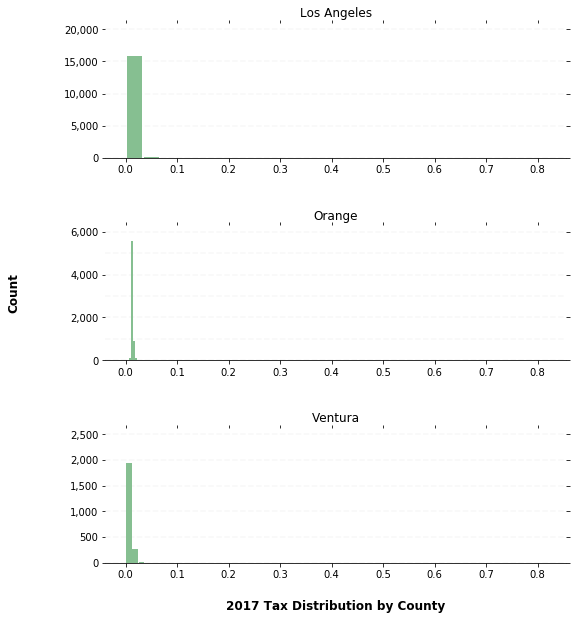

In [33]:
from matplotlib.ticker import StrMethodFormatter

ax = df.hist(column='tax_rate', by='county_name', bins=25, grid=False, figsize=(8,10), layout=(3,1), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)

for i,x in enumerate(ax):

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Set x-axis label
    x.set_xlabel("2017 Tax Distribution by County", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    if i == 1:
        x.set_ylabel("Count", labelpad=50, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

    x.tick_params(axis='x', rotation=0)

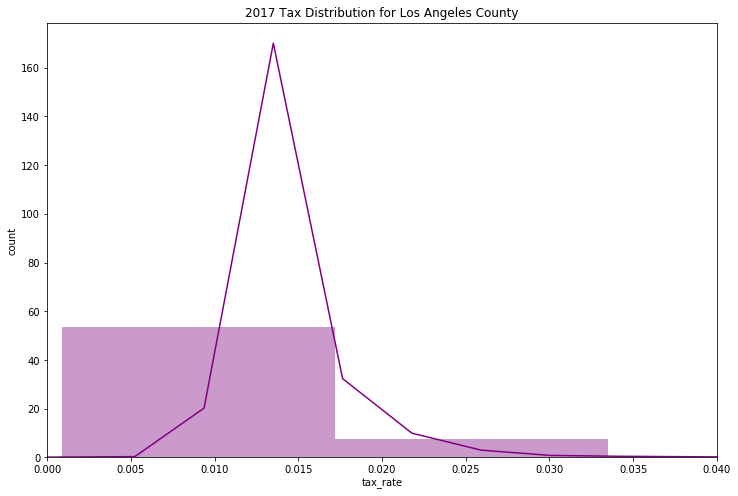

In [30]:

plt.figure(figsize=(12, 8))
sns.distplot(los_angeles_tax_dist, color = 'Purple')
plt.xlim(0, 0.04)
plt.ylabel('count')
plt.title('2017 Tax Distribution for Los Angeles County')
plt.savefig('la.png')

In [ ]:
# After reviewing the pairwise correlations, I've decided on my features 

features = [
    "bedrooms",
    "bathrooms",
    "square_feet",
    "appraisal_value"
]

df = df[features]
df.head()

In [ ]:
# Take a look at the 

df[['square_feet', 'appraisal_value']].describe()

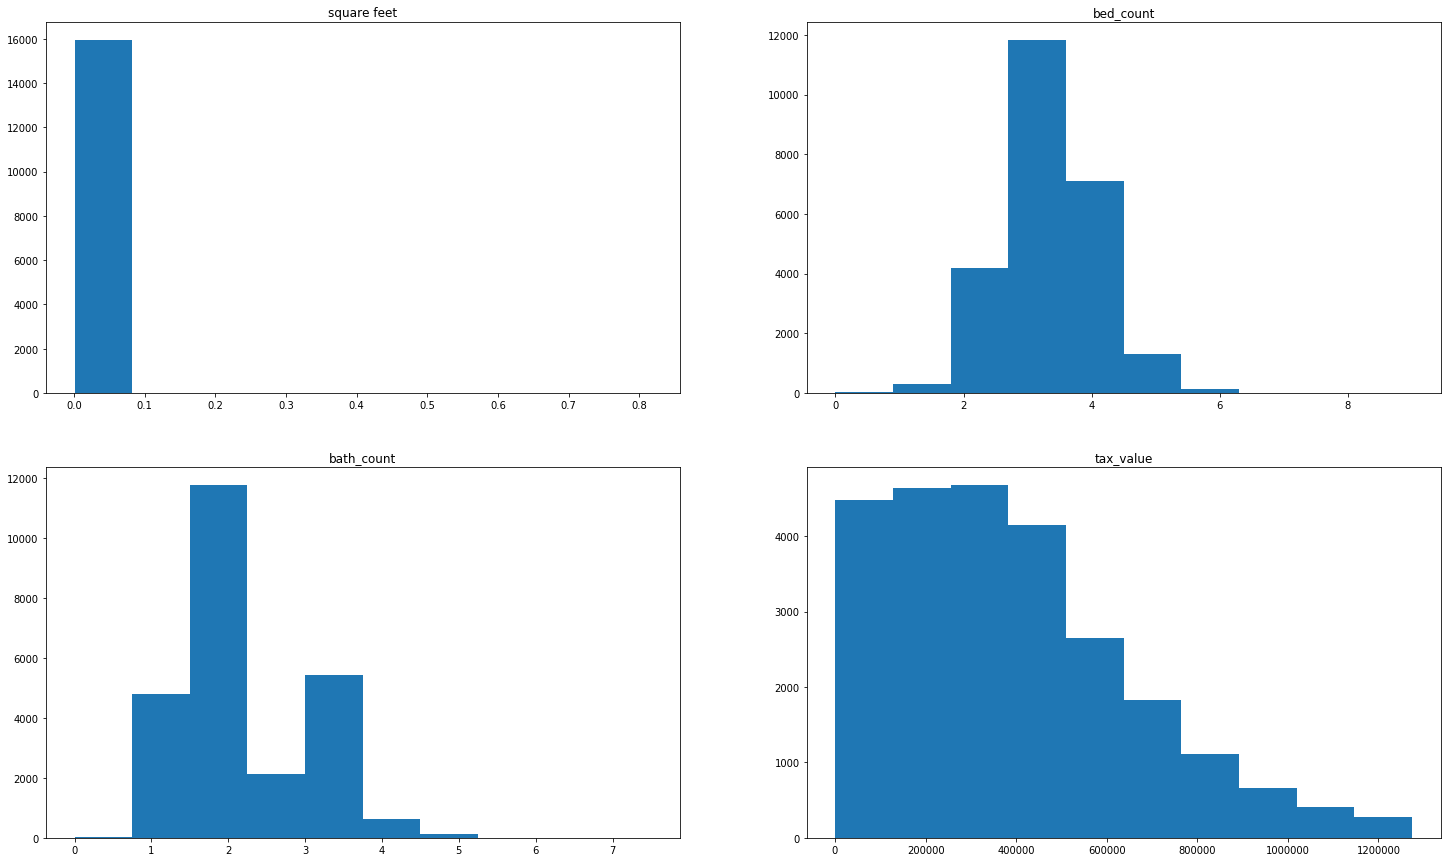

In [27]:
# Construct a figure with subplots of histograms of features

# Sets size, can adjust 
plt.subplots(figsize=(25, 15))

plt.subplot(2,2,1);
line1 = plt.hist(los_angeles_tax_dist)
plt.title('square feet');

plt.subplot(2,2,2);
line2 = plt.hist(df.bedrooms);
plt.title('bed_count');

plt.subplot(2,2,3);
line3 = plt.hist(df.bathrooms);
plt.title('bath_count');

plt.subplot(2,2,4);
line3 = plt.hist(df.appraisal_value);
plt.title('tax_value');

In [ ]:
# Split the data into train, validate, and test and then confirm the shape of the split sets

train, validate, test = prepare.split(df)

In [ ]:
sns.heatmap(df.corr(),cmap="Blues")

In [ ]:
sns.pairplot(df, corner=True)

In [ ]:
# Visualize the original variables versus the scaled variables

plt.figure(figsize=(15, 10))

plt.subplot(321)
plt.hist(train.square_feet, bins=25, ec='black')
plt.title('Original Square Feet')
plt.subplot(322)
plt.hist(train.square_feet_scaled, bins=25, ec='black')
plt.title('MinMax Scaled Square Feet')

plt.subplot(323)
plt.hist(train.bedrooms, bins=25, ec='black')
plt.title('Original Bed Count')
plt.subplot(324)
plt.hist(train.bedrooms_scaled, bins=25, ec='black')
plt.title('MinMax Scaled Bed Count')

plt.subplot(325)
plt.hist(train.bathrooms, bins=25, ec='black')
plt.title('Original Square Feet')
plt.subplot(326)
plt.hist(train.bathrooms_scaled, bins=25, ec='black')
plt.title('MinMax Scaled Square Feet')

In [ ]:
# Calculate the tax rate

df['tax_rate'] = (df['taxes'] / df['appraisal_value'])

In [ ]:
# now to add the county for the FIPS numbers provided from the db
# using this resource here
# https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=2&ved=2ahUKEwi27cfmn9noAhVNnKwKHSFhBNgQFjABegQIBRAB&url=https%3A%2F%2Fwww2.census.gov%2Fprograms-surveys%2Fpopest%2Fgeographies%2F2017%2Fall-geocodes-v2017.xlsx&usg=AOvVaw1o_RYNM9evsn9LJdV2iXC1
# it will download an excel file of the 2017 fips codes, as they can change annually

zillow['county_name'] = zillow['fips'].map({6037: 'Los Angeles', 6059: 'Orange', 6111: 'Ventura'})

In [ ]:
### Takeaways:
